In [1]:
import numpy as np
import pickle
import pandas as pd
import itertools

In [2]:
I_list = [2,3] # candidatos (C)
G_list = [2,3] # grupos (G)
M = 50  # mesas (B)
J = 100 # personas por mesa (I)
lambda_list = [5*i for i in range(0,21)]
seed_list = [i for i in range(20)]

In [3]:
lambda_errors = []

instance_dict = {}

for I in I_list:
    for G in G_list:
        instance_dict[I,G] = []
        for lambda_ in lambda_list:
            lambda_error = []
            wrong_seeds = []
            for s in seed_list:
                # read pickle with dict_result
                name_of_instance = f"J{J}_M{M}_G{G}_I{I}_lambda{int(lambda_)}"
                dict_path = f'results/{name_of_instance}/full/{s}.pickle'
                # read pickle
                # check if path exists
                
                try:
                    with open(dict_path, 'rb') as f:
                        dict_results = pickle.load(f)
                    # if s == 0:
                    #     print(lambda_)
                    #     print(dict_results['b'][[0,12,20,30]])
                    p_est = dict_results['p_est']
                    p = dict_results['p']
                    error = np.mean(np.abs(p_est-p))
                    # print(lambda_, error)
                    lambda_error.append(error)
                except:
                    wrong_seeds.append(s)
                    # print(f'{name_of_instance}')
            
            # check if there are wrong seeds
            if len(wrong_seeds) > 0:
                # print instance + seeds separated by comma
                # transform wrong seeds to string separated by comma
                wrong_seeds = ','.join([str(s) for s in wrong_seeds])
                print(f'{name_of_instance} {wrong_seeds}')

            # lambda_errors.append(np.mean(lambda_error))
            instance_dict[I,G].append(np.mean(lambda_error))
                # error = np.linalg.norm(p_est-p)

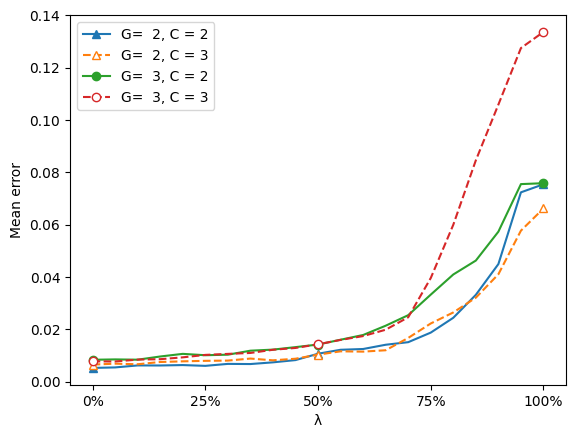

In [6]:
# plot
import matplotlib.pyplot as plt

line_styles = ['-', '--']# ':', '--']
marker_styles = ['^','^','o','o']
# fill_styles = ['full', 'none', 'none', 'full']
fill_styles = [None]
markerface_colors = [None, 'white']

for idx, (G,I) in enumerate(itertools.product(G_list, I_list)):
    line_style = line_styles[idx % len(line_styles)]
    marker_style = marker_styles[idx % len(marker_styles)]
    fillstyle = fill_styles[idx % len(fill_styles)]
    markerfacecolor = markerface_colors[idx % len(markerface_colors)]

    # smooththe plot

    plt.plot(lambda_list, instance_dict[(I, G)], label='G=  {}, C = {}'.format(G, I), linestyle = line_style, 
        marker = marker_style, markersize = 6, fillstyle = fillstyle, markevery=10, markerfacecolor = markerfacecolor)

    # add percent to x axis
    plt.xticks(lambda_list, [f'{l}%' for l in lambda_list])
    # show only in steps by 20
    plt.xticks(lambda_list[::5])
plt.legend()
plt.xlabel('λ')
plt.ylabel('Mean error')
plt.savefig('images/lambda_analysis.pdf', bbox_inches='tight')
# plot in black and white
# plt.style.use('grayscale')